In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os
import sys

# Analysis for null hypothesis simulations where permutations are done across all z-slices

Peripheral metric

In [6]:
import glob
sorted(glob.glob('../../inputs/mouse?sample?.hdf5'))

['../../inputs/mouse1sample1.hdf5',
 '../../inputs/mouse1sample2.hdf5',
 '../../inputs/mouse1sample3.hdf5',
 '../../inputs/mouse1sample4.hdf5',
 '../../inputs/mouse1sample5.hdf5',
 '../../inputs/mouse1sample6.hdf5',
 '../../inputs/mouse2sample1.hdf5',
 '../../inputs/mouse2sample2.hdf5',
 '../../inputs/mouse2sample3.hdf5',
 '../../inputs/mouse2sample4.hdf5',
 '../../inputs/mouse2sample5.hdf5',
 '../../inputs/mouse2sample6.hdf5']

In [ ]:
'../../outputs/simulations/'

,metric,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,z,p,bh_p,it_num
16,peripheral,1810046K07Rik,Pvalb_3,11,1.0,592.0,0.040268,-0.331807,0.740035,0.975848,0
45,peripheral,5730522E02Rik,Pvalb_2,10,1.0,518.5,0.349540,1.814768,0.069560,0.906977,0
55,peripheral,Acta2,Pvalb_1,57,1.0,526.0,-0.027915,-0.076625,0.938922,0.997227,0
59,peripheral,Acta2,Pvalb_2,91,2.0,387.0,0.024000,-0.182065,0.855531,0.995271,0
60,peripheral,Acta2,Pvalb_3,68,1.5,436.5,0.041057,-0.266768,0.789648,0.983791,0


'Num unique annotations'

18

'Num unique gene/cell-type pairs'

(1433, 2)

'Num simulations'

1000

'Frequency of false positives'

0    998
1      2
Name: bh_p, dtype: int64

'Agg df'

,gene,annotation,frac_sig_its,num_cells,med_gene_spots,med_spots
1156,Slco5a1,Pvalb_2,0.028,14,1.0,422.0
461,Flrt3,Vip_2,0.029,14,1.5,515.5
682,Nhs,Pvalb_2,0.031,94,2.0,412.0
717,Nos1,Vip_9,0.031,10,2.0,390.5
74,Aqp4,Vip_2,0.031,15,2.0,461.0
...,...,...,...,...,...,...
1136,Slc32a1,Vip_1,0.068,31,12.0,245.0
637,March1,Pvalb_3,0.069,50,1.0,444.0
741,Nr2f2,Vip_2,0.069,26,6.0,411.0
1000,Rgs6,Pvalb_1,0.069,27,1.0,478.0


'Median frac sig (no BH)'

0.049

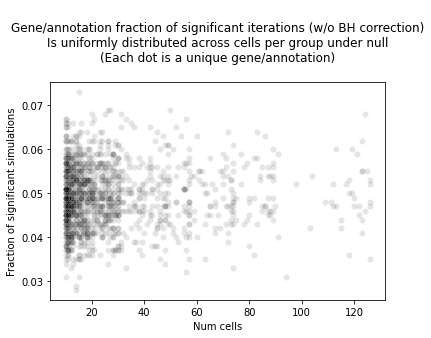

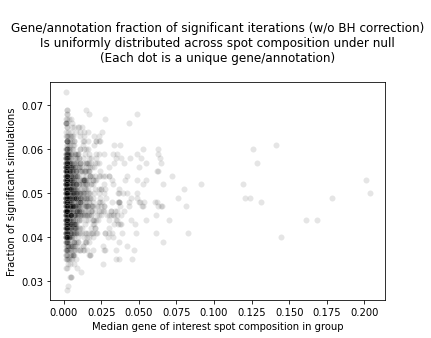

In [2]:
df = pd.read_csv('../../outputs/simulations/m1s1_10_null_permutes_across_z.csv')
df = df[df['num_cells'].ge(10)] #set a threshold to only consider gene/annotations with at least 10 cells
display(df.head())


display('Num unique annotations',df['annotation'].nunique())

display('Num unique gene/cell-type pairs',df[['gene','annotation']].drop_duplicates().shape)

display('Num simulations',df['it_num'].nunique())

num_sig_per_it_by_bh = df.groupby('it_num')['bh_p'].apply(lambda v: sum(v <= 0.05))
display('Frequency of false positives',num_sig_per_it_by_bh.value_counts())

#For each gene/annotation, expect 5% false positives over the multiple iterations at alpha of 0.05
gb_cols = ['gene','annotation']
agg_df = df.groupby(gb_cols).agg(
    frac_sig_its = ('p',lambda v: sum(v <= 0.05)/1000),
    num_cells = ('num_cells','first'),
    med_gene_spots = ('med_gene_spots','first'),
    med_spots = ('med_spots','first'),
).reset_index()

display('Agg df',agg_df.sort_values('frac_sig_its'))
display('Median frac sig (no BH)',agg_df['frac_sig_its'].median())


#Plot frac vs num cells to see if there is bias on a graph
g = sns.scatterplot(
    x = 'num_cells',
    y = 'frac_sig_its',
    color = 'black',
    alpha = 0.1,
    data = agg_df,
)
plt.xlabel('Num cells')
plt.ylabel('Fraction of significant simulations')
plt.title(
"""
Gene/annotation fraction of significant iterations (w/o BH correction)
Is uniformly distributed across cells per group under null
(Each dot is a unique gene/annotation)
"""
)
plt.show()
#plt.savefig('sim_cells_per_ont.svg')
plt.close()

#Plot frac vs gene-frac to see if there is bias on a graph
agg_df['med_gene_frac'] = agg_df['med_gene_spots']/agg_df['med_spots']
g = sns.scatterplot(
    x = 'med_gene_frac',
    y = 'frac_sig_its',
    color = 'black',
    alpha = 0.1,
    data = agg_df,
)
plt.xlabel('Median gene of interest spot composition in group')
plt.ylabel('Fraction of significant simulations')
plt.title(
"""
Gene/annotation fraction of significant iterations (w/o BH correction)
Is uniformly distributed across spot composition under null
(Each dot is a unique gene/annotation)
"""
)
plt.show()
plt.savefig('sim_med_gene_frac.svg')
plt.close()

# Analysis for null hypothesis simulations where permutations are done within each z-slice

,metric,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,z,p,bh_p,it_num
16,peripheral,1810046K07Rik,Pvalb_3,11,1.0,592.0,-0.240964,-0.723991,0.469071,0.928881,0
45,peripheral,5730522E02Rik,Pvalb_2,10,1.0,518.5,0.153775,0.611985,0.540548,0.947702,0
55,peripheral,Acta2,Pvalb_1,57,1.0,526.0,0.122349,1.812279,0.069943,0.834236,0
59,peripheral,Acta2,Pvalb_2,91,2.0,387.0,-0.125000,-2.192278,0.028359,0.834236,0
60,peripheral,Acta2,Pvalb_3,68,1.5,436.5,0.070897,0.687074,0.492036,0.933721,0


'Num unique annotations'

18

'Num unique gene/cell-type pairs'

(1433, 2)

'Num simulations'

1000

'Frequency of false positives'

0    967
1     30
2      3
Name: bh_p, dtype: int64

'Agg df'

,gene,annotation,frac_sig_its,num_cells,med_gene_spots,med_spots
481,Glra1,Vip_9,0.017,10,1.0,268.0
502,Grik1,Vip_9,0.017,10,3.5,374.0
1193,St6galnac5,Vip_10,0.018,10,10.5,404.0
1379,Unc5d,Vip_8,0.021,10,1.0,426.0
121,Brinp3,Vip_3,0.021,18,1.0,393.5
...,...,...,...,...,...,...
1129,Slc32a1,Pvalb_3,0.393,89,69.0,428.0
255,Cemip,Pvalb_5,0.407,48,10.5,461.5
1128,Slc32a1,Pvalb_2,0.414,126,41.0,344.0
250,Cemip,Pvalb_1,0.491,74,18.0,473.5


'Median frac sig (no BH)'

0.048

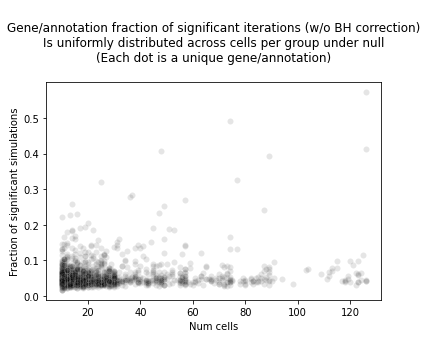

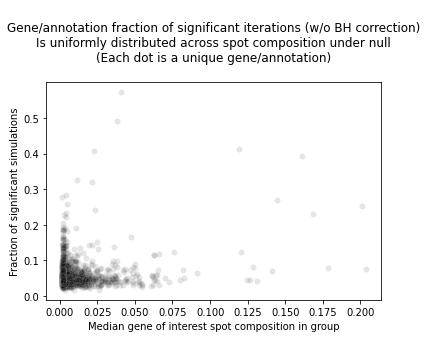

In [3]:
df = pd.read_csv('../outputs/simulations/m1s1_10_null_permutes_within_z.csv')
df = df[df['num_cells'].ge(10)] #set a threshold to only consider gene/annotations with at least 10 cells
display(df.head())


display('Num unique annotations',df['annotation'].nunique())

display('Num unique gene/cell-type pairs',df[['gene','annotation']].drop_duplicates().shape)

display('Num simulations',df['it_num'].nunique())

num_sig_per_it_by_bh = df.groupby('it_num')['bh_p'].apply(lambda v: sum(v <= 0.05))
display('Frequency of false positives',num_sig_per_it_by_bh.value_counts())

#For each gene/annotation, expect 5% false positives over the multiple iterations at alpha of 0.05
gb_cols = ['gene','annotation']
agg_df = df.groupby(gb_cols).agg(
    frac_sig_its = ('p',lambda v: sum(v <= 0.05)/1000),
    num_cells = ('num_cells','first'),
    med_gene_spots = ('med_gene_spots','first'),
    med_spots = ('med_spots','first'),
).reset_index()

display('Agg df',agg_df.sort_values('frac_sig_its'))
display('Median frac sig (no BH)',agg_df['frac_sig_its'].median())


#Plot frac vs num cells to see if there is bias on a graph
sns.scatterplot(
    x = 'num_cells',
    y = 'frac_sig_its',
    color = 'black',
    alpha = 0.1,
    data = agg_df,
)
plt.xlabel('Num cells')
plt.ylabel('Fraction of significant simulations')
plt.title(
"""
Gene/annotation fraction of significant iterations (w/o BH correction)
Is uniformly distributed across cells per group under null
(Each dot is a unique gene/annotation)
"""
)
plt.show()
plt.close()

#Plot frac vs gene-frac to see if there is bias on a graph
agg_df['med_gene_frac'] = agg_df['med_gene_spots']/agg_df['med_spots']
sns.scatterplot(
    x = 'med_gene_frac',
    y = 'frac_sig_its',
    color = 'black',
    alpha = 0.1,
    data = agg_df,
)
plt.xlabel('Median gene of interest spot composition in group')
plt.ylabel('Fraction of significant simulations')
plt.title(
"""
Gene/annotation fraction of significant iterations (w/o BH correction)
Is uniformly distributed across spot composition under null
(Each dot is a unique gene/annotation)
"""
)
plt.show()
plt.close()

In [4]:
agg_df.sort_values('frac_sig_its',ascending=False)

,gene,annotation,frac_sig_its,num_cells,med_gene_spots,med_spots,med_gene_frac
252,Cemip,Pvalb_2,0.572,126,14.0,344.0,0.040698
250,Cemip,Pvalb_1,0.491,74,18.0,473.5,0.038015
1128,Slc32a1,Pvalb_2,0.414,126,41.0,344.0,0.119186
255,Cemip,Pvalb_5,0.407,48,10.5,461.5,0.022752
1129,Slc32a1,Pvalb_3,0.393,89,69.0,428.0,0.161215
...,...,...,...,...,...,...,...
121,Brinp3,Vip_3,0.021,18,1.0,393.5,0.002541
1379,Unc5d,Vip_8,0.021,10,1.0,426.0,0.002347
1193,St6galnac5,Vip_10,0.018,10,10.5,404.0,0.025990
481,Glra1,Vip_9,0.017,10,1.0,268.0,0.003731


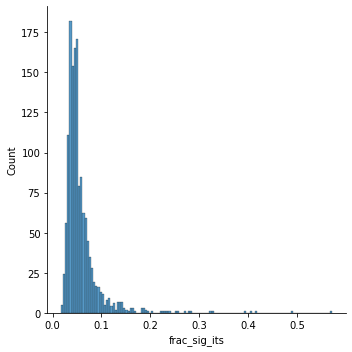

In [5]:
sns.displot(agg_df['frac_sig_its'])
plt.show()
plt.close()